## Assignment 05

<br>Author: Anjani Bonda
<br>Date: 4/15/2023

### Assignment 5.1

Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [27]:
# Load all the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [28]:
## Import models and layers from keras
from keras import models
from keras import layers
from keras.utils import to_categorical

#### Load the dataset

In [3]:
# Load the IMDB dataset
from keras.datasets import imdb
# split train / test data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


#### Prepare data

In [4]:
# Encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
# Vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#### Model Building

In [8]:
## Define keras model as sequential
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### Model Validation

In [10]:
## Set aside a validation set (10,000 samples)
# Data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Model Training

In [11]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 110ms/step - loss: 0.5206 - accuracy: 0.7805 - val_loss: 0.4386 - val_accuracy: 0.8120
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3208 - accuracy: 0.9011 - val_loss: 0.3271 - val_accuracy: 0.8760
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2340 - accuracy: 0.9273 - val_loss: 0.2819 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1840 - accuracy: 0.9394 - val_loss: 0.2781 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1494 - accuracy: 0.9529 - val_loss: 0.2852 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1233 - accuracy: 0.9626 - val_loss: 0.2891 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1040 - accuracy: 0.9683 - val_loss: 0.3032 - val_accuracy: 0.8840
Epoch 8/20
3

#### Plot Model Output and Loss

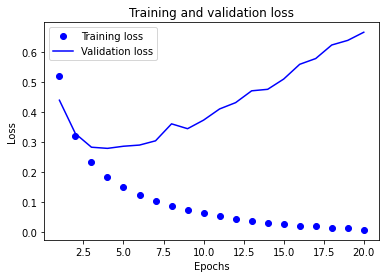

In [12]:
# Plot the training and validation LOSS
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") # 'bo' blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # 'b' blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

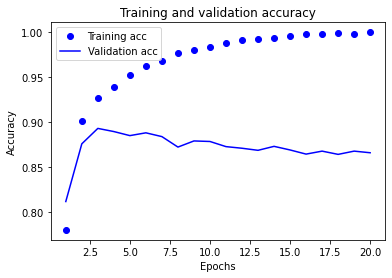

In [13]:
# Plot the training and validation ACCURACY
plt.clf()  # clear the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Model Fitting

In [14]:
# Fit model
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.2287 - accuracy: 0.9454
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1411 - accuracy: 0.9585
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1156 - accuracy: 0.9653
Epoch 4/4
49/49 [==============================] - 1s 18ms/step - loss: 0.0947 - accuracy: 0.9704


In [15]:
# Evaluate model
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4833 - accuracy: 0.8586


In [16]:
# Show results
print(f'Test loss: {results[0]:0.3f}\nTest accuracy: {results[1]:0.3f}')

Test loss: 0.483
Test accuracy: 0.859


#### Generate predictions

In [17]:
# Predict test data
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.01214925],
       [0.99996805],
       [0.71127635],
       ...,
       [0.03993864],
       [0.04501442],
       [0.7804223 ]], dtype=float32)

### Assignment 5.2
Implement the news classifier found in section 3.5 of Deep Learning with Python.

#### Load the data

In [51]:
# Load the Reuters dataset
from tensorflow.keras.datasets import reuters
# split train / test data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [52]:
print("The length of traning dataset: {}".format(len(train_data)))
print("The length of test dataset: {}".format(len(test_data)))

The length of traning dataset: 8982
The length of test dataset: 2246


#### Data Preparation

In [53]:
# Encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [54]:
# Vectorize the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [55]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [56]:
# Set up one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [57]:
# One-hot encode the labels
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#### Model Building

In [58]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [59]:
# Compile the model
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

#### Model Validation

In [60]:
## Set aside a validation set (1000 samples)
# Data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
# Labels
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [61]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.5454 - accuracy: 0.5256 - val_loss: 1.6854 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.3972 - accuracy: 0.7050 - val_loss: 1.3175 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0585 - accuracy: 0.7720 - val_loss: 1.1556 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8413 - accuracy: 0.8239 - val_loss: 1.0654 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.6772 - accuracy: 0.8502 - val_loss: 0.9840 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5454 - accuracy: 0.8806 - val_loss: 0.9450 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 57ms/step - loss: 0.4404 - accuracy: 0.9067 - val_loss: 0.9305 - val_accuracy: 0.7970
Epoch 8/20
16

#### Plot the result

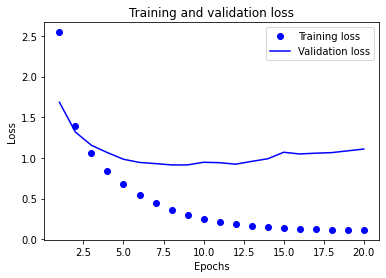

In [62]:
# Plot the training and validation LOSS
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

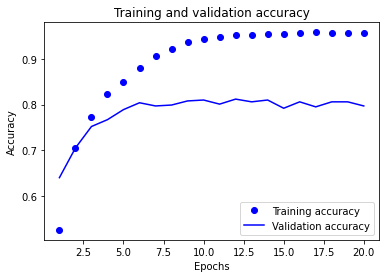

In [63]:
# Plot the training and validation ACCURACY
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Model Fitting

In [64]:
# Fit model
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

Epoch 1/9


2023-04-16 23:10:36.980548: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'categorical_crossentropy/cond/output/_10'


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs' defined at (most recent call last):
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_2957/1659230057.py", line 2, in <cell line: 2>
      model.fit(x_train,
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs'
Incompatible shapes: [512] vs. [512,46]
	 [[{{node gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_6274]

In [35]:
# Evaluate model
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.3359 - accuracy: 0.7876


In [37]:
# Show results
print(f'Test loss: {results[0]:0.3f}\nTest accuracy: {results[1]:0.3f}')

Test loss: 1.336
Test accuracy: 0.788


In [38]:
# Predict test data
predictions = model.predict(x_test)

In [39]:
predictions[0]

array([4.96593930e-06, 8.68394636e-07, 1.36702042e-07, 8.62344682e-01,
       7.67317712e-02, 1.47404214e-10, 3.00806868e-09, 6.34642565e-05,
       6.04539830e-03, 1.01301430e-06, 4.23747331e-08, 2.77778786e-02,
       3.22184064e-06, 5.35935169e-06, 3.60176813e-08, 2.30063506e-07,
       6.53075171e-04, 4.67550336e-08, 1.18455284e-06, 2.89977156e-03,
       2.32233517e-02, 1.07884094e-04, 2.67851181e-08, 6.77256153e-08,
       4.97829822e-09, 4.14858590e-07, 2.04205611e-10, 1.11060615e-07,
       4.64958021e-06, 3.71215856e-06, 1.65704259e-05, 1.66338974e-11,
       9.97571419e-07, 9.28010724e-10, 5.14841759e-06, 1.58880198e-07,
       7.74415894e-05, 4.70382240e-08, 4.13131920e-06, 2.11911884e-05,
       3.13704675e-07, 5.16779664e-07, 7.80447973e-09, 1.84905355e-10,
       2.11908702e-12, 1.00457470e-07], dtype=float32)

### Assignment 5.3
Implement the housing price regression model found in section 3.6 of Deep Learning with Python

#### Load Data

In [50]:
# Load the Boston Housing dataset
from keras.datasets import boston_housing
# split train / test data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [51]:
print("The length of traning dataset: {}".format(len(train_data)))
print("The length of test dataset: {}".format(len(test_data)))

The length of traning dataset: 404
The length of test dataset: 102


#### Data Preparation

In [52]:
## Perform feature-wise normalization
# Normalize train data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /=std
# Normalize test data
test_data -= mean
test_data /= std

#### Model Building

In [53]:
def build_model():
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # Compile the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#### Validate the model

In [54]:
# Set up K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #: {i}")
    # prepare the validation data (from partition #k)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # prepare training data (from non-k partitions)
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build the already compiled keras model
    model = build_model()
    
    # train the model, saving validation logs at each fold
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) # verbose=0: silent mode
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #: 0
Processing fold #: 1
Processing fold #: 2
Processing fold #: 3


In [55]:
# Compute the average of per-epoch MAE scores for all folds
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

#### Plot the results

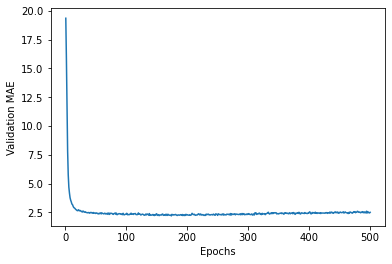

In [56]:
# Plot the validation MAE by epoch
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

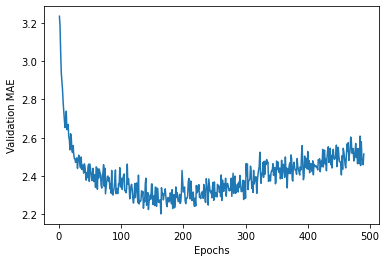

In [57]:
# Plot again, omitting the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Model Training

In [58]:
model = build_model() # get a fresh compiled model
# Train on the entirety of the training data
model.fit(train_data, train_targets,
         epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.8116 - mae: 2.5601


In [59]:
# Evaluate model
test_mae_score

2.5600898265838623

#### Generate Predictions

In [60]:
# Predict test data
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.194735], dtype=float32)